In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
sns.set_style('whitegrid')
from os import X_OK
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [ ]:
data = pd.read_csv('myBca.csv')

In [ ]:
data.count()

,0
clean_text,1958
sentimen,1958


In [ ]:
data['length'] = data['clean_text'].apply(len)
data.head()

,clean_text,sentimen,length
0,Mambantuk,negatif,9
1,Mantap sekali puas aplikasi nyah,positif,32
2,Good,positif,4
3,Mantapp sukses selalu,positif,21
4,Token PLN saya Uda isi tapi gak di kirimkan to...,negatif,69


In [ ]:
data['textLength'] = data['clean_text'].apply(len)
data['textLength'].describe()

,textLength
count,1958.000000
mean,107.425434
std,102.597314
min,1.000000
25%,38.000000
50%,79.000000
75%,144.000000
max,908.000000


In [ ]:
y = data.sentimen
X = data.clean_text
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
print(y.value_counts())

sentimen
negatif    1154
positif     804
Name: count, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

mnb = MultinomialNB()

mnb.fit(X_train_vect, y_train)
y_pred = mnb.predict(X_test_vect)

accuracy_score(y_test, y_pred)

0.7295918367346939

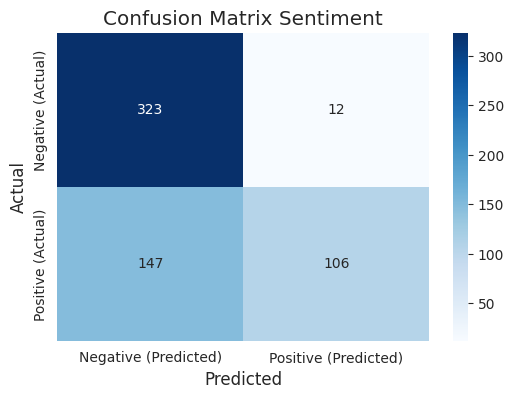

In [ ]:
cm = confusion_matrix(y_test, y_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (Predicted)', 'Positive (Predicted)'],
            yticklabels=['Negative (Actual)', 'Positive (Actual)'])
plt.title('Confusion Matrix Sentiment')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
pipeline = make_pipeline(TfidfVectorizer(use_idf=True, strip_accents='ascii'), MultinomialNB())

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print('Cross-Validation Scores (Accuracy per Fold) :', cv_scores)
print('Mean Accuracy:', cv_scores.mean())

Cross-Validation Scores (Accuracy per Fold) : [0.80102041 0.83163265 0.71173469 0.70588235 0.67263427]
Mean Accuracy: 0.7445808758285923


In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

data = pd.read_csv('myBca_sentimen.csv')

data['sentimen'] = data['sentimen'].map({'positif': 1, 'negatif': 0})

vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')

X = data['clean_text']
y = data['sentimen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

vectorizer.fit(pd.concat([X_train, X_test]))

X_train_vect = vectorizer.transform(X_train)
X_test_vect = vectorizer.transform(X_test)

mnb = MultinomialNB()

mnb.fit(X_train_vect, y_train)

y_pred = mnb.predict(X_test_vect)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

with open('mnb.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


Accuracy: 0.7278911564625851


In [ ]:
!pip install h5py
!pip install typing-extensions
!pip install wheel
!pip install streamlit

In [ ]:
%%writefile app.py
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import streamlit as st

with open('mnb.pkl', 'rb') as model_file:
    classifier = pickle.load(model_file)

with open('vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

def prediction(text):
    text_vect = vectorizer.transform([text])
    prediction = classifier.predict(text_vect)

    sentiment_map = {0: 'negatif', 1: 'positif'}
    sentiment_name = sentiment_map[prediction[0]]
    return sentiment_name

def main():
    st.title('Prediksi Sentimen Review')

    html_temp = """
    <div style = "background-color:yellow;padding:13px">
    <h1 style = "color:black;text-align:center;">Prediksi Sentimen FP Datmin </h1>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html=True)

    review_text = st.text_area('Masukkan Teks yang Ingin di Prediksi', 'Tulis di sini')

    result = ""
    if st.button('Prediksi Sentimen'):
        if review_text:
            result = prediction(review_text)
            st.success(f'Hasil Prediksi Sentimen: {result}')
        else:
            st.warning('Harap masukkan teks review.')

if __name__ == '__main__':
    main()


Overwriting app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.168.148.33


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.148.33:8501

⠦⠧your url is: https://stale-laws-share.loca.lt
  Stopping...
^C


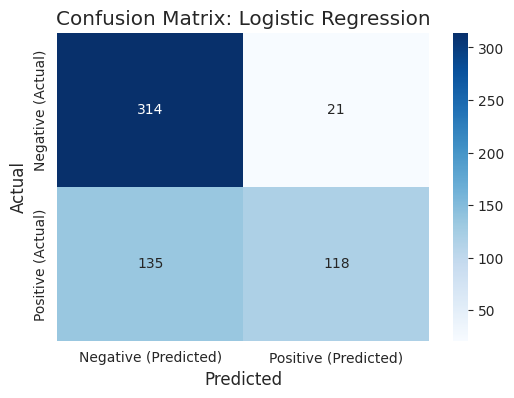

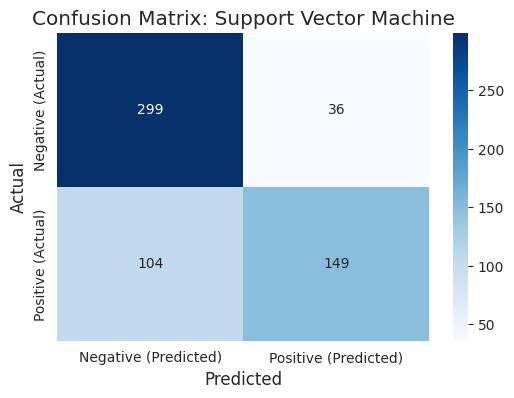

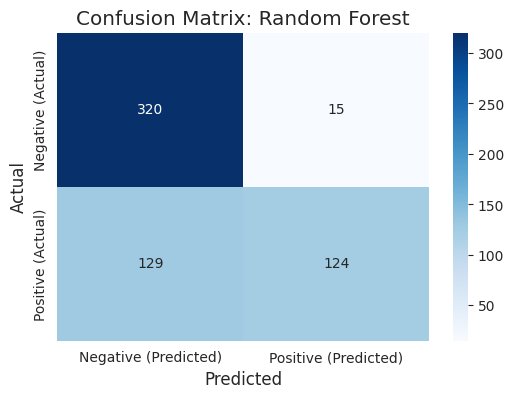

Logistic Regression: Accuracy = 0.7347
Support Vector Machine: Accuracy = 0.7619
Random Forest: Accuracy = 0.7551
Cross-Validation Scores (Accuracy per Fold) for Logistic Regression: [0.7810219  0.7080292  0.74087591 0.74452555 0.75182482]
Mean Accuracy: 0.7452554744525547


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('myBca.csv')

# Preprocessing
data['sentimen'] = data['sentimen'].map({'positif': 1, 'negatif': 0})
X = data['clean_text']
y = data['sentimen']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=44),
    'Support Vector Machine': SVC(kernel='linear', random_state=44),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=44)
}

# Evaluate models
results = {}

for model_name, model in models.items():
    # Train model
    model.fit(X_train_vect, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_vect)

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative (Predicted)', 'Positive (Predicted)'],
                yticklabels=['Negative (Actual)', 'Positive (Actual)'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print results
for model_name, accuracy in results.items():
    print(f'{model_name}: Accuracy = {accuracy:.4f}')

# Cross-validation for Logistic Regression (example)
pipeline = LogisticRegression(random_state=44)
cv_scores = cross_val_score(pipeline, X_train_vect, y_train, cv=5, scoring='accuracy')

print('Cross-Validation Scores (Accuracy per Fold) for Logistic Regression:', cv_scores)
print('Mean Accuracy:', cv_scores.mean())


In [ ]:
%%writefile app2.py
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import streamlit as st

# Load dataset
data = pd.read_csv('myBca.csv')

# Preprocessing
data['sentimen'] = data['sentimen'].map({'positif': 1, 'negatif': 0})
X = data['clean_text']
y = data['sentimen']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Save vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=44),
    'Support Vector Machine': SVC(kernel='linear', random_state=44),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=44)
}

# Train and save models
for model_name, model in models.items():
    model.fit(X_train_vect, y_train)
    with open(f'{model_name.replace(" ", "_").lower()}.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)

# Streamlit app setup
def load_model(model_name):
    with open(f'{model_name}.pkl', 'rb') as file:
        return pickle.load(file)

def predict_sentiment(model, text, vectorizer):
    text_vect = vectorizer.transform([text])
    prediction = model.predict(text_vect)[0]
    sentiment_map = {0: 'negatif', 1: 'positif'}
    return sentiment_map[prediction]

def main():
    st.title('Sentiment Prediction App')

    html_temp = """
    <div style="background-color:yellow;padding:10px">
    <h2 style="color:black;text-align:center;">Sentiment Classification</h2>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html=True)

    model_choice = st.selectbox('Choose Model', ['Logistic Regression', 'Support Vector Machine', 'Random Forest'])

    review_text = st.text_area('Enter the text for sentiment analysis', 'Type here...')

    if st.button('Predict Sentiment'):
        if review_text:
            vectorizer = load_model('vectorizer')
            model_name = model_choice.replace(' ', '_').lower()
            model = load_model(model_name)
            result = predict_sentiment(model, review_text, vectorizer)
            st.success(f'The predicted sentiment is: {result}')
        else:
            st.warning('Please enter text for sentiment analysis.')

if __name__ == '__main__':
    main()


Writing app2.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.168.148.33


In [ ]:
!streamlit run app2.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.148.33:8501

⠸⠼⠴⠦your url is: https://short-peaches-relate.loca.lt
/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:37649 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:517:28)
    at emitErrorNT (node:internal/streams/destroy:151:8)
    at emitErrorCloseNT (node:internal/streams/destroy:116:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v18.20.5
⠙